## NYC Citi Bike System Data Analysis

For this assignment, I downloaded the data and uploaded it to my own PostgreSQL database as Google Big Query public dataset did not have all the data for each month available within the 2016-2017 time period.

1. A set of SQL queries you used to explore the underlying data
2. A Python script that includes deeper analyses of the data
3. Visualizations, key findings, and a set of written recommendations which summarize your analysis and offer next steps for the business

Based on the requirements, my assumptions were the following: 

* Use SQL to reduce the large dataset into more manageable datasets to obtain specific metrics for business
* Utilize Python data analysis libraries (Pandas, matplotlib, seaborn) to further cleanse the data and present visualizations 
* Briefly explain what's the purpose and how it can help business make a data driven descision




Before uploading, I noticed that there were a few empty values within the "birth year" column. As the data cannot be uploaded with CSV files unless the value was filled with a "null" word. In my case, I used the simple loop below to have each file read as a dataframe and filled with the "null" word in order to create a new file for data upload

In [42]:
#Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
%matplotlib inline

In [ ]:
#Interates through the years and months in order fill the null values within "birth year" column of each file"
for i in range(2016,2018):
    for j in range(1,13):
        if j < 10:
            df = pd.read_csv(str(i) + "0" + str(j) +"-citibike-tripdata.csv")
            df["birth year"].fillna("null", inplace = True) 
            df.to_csv( str(i) + "0" + str(j) + '.csv', index=False)
        else:
            df = pd.read_csv(str(i) + str(j) +"-citibike-tripdata.csv")
            df["birth year"].fillna("null", inplace = True) 
            df.to_csv( str(i) +  str(j) + '.csv', index=False)

## Exploring the Data

### Number of Trips throughout the time periods

The number of trips is main focus as it can determine how the users are utilizing the bike system. One thing I wanted to know is are there certain time periods that have more bike usage then other time periods? 


**What is the trend of the usage of the bike system throughout months?**

*Query Used*

'SELECT Date(starttime) as Date, COUNT(*) AS num_trips from bike WHERE extract(year from starttime) = 2016 or extract(year from starttime) = 2017 group by Date(starttime)'

<Figure size 1440x720 with 0 Axes>

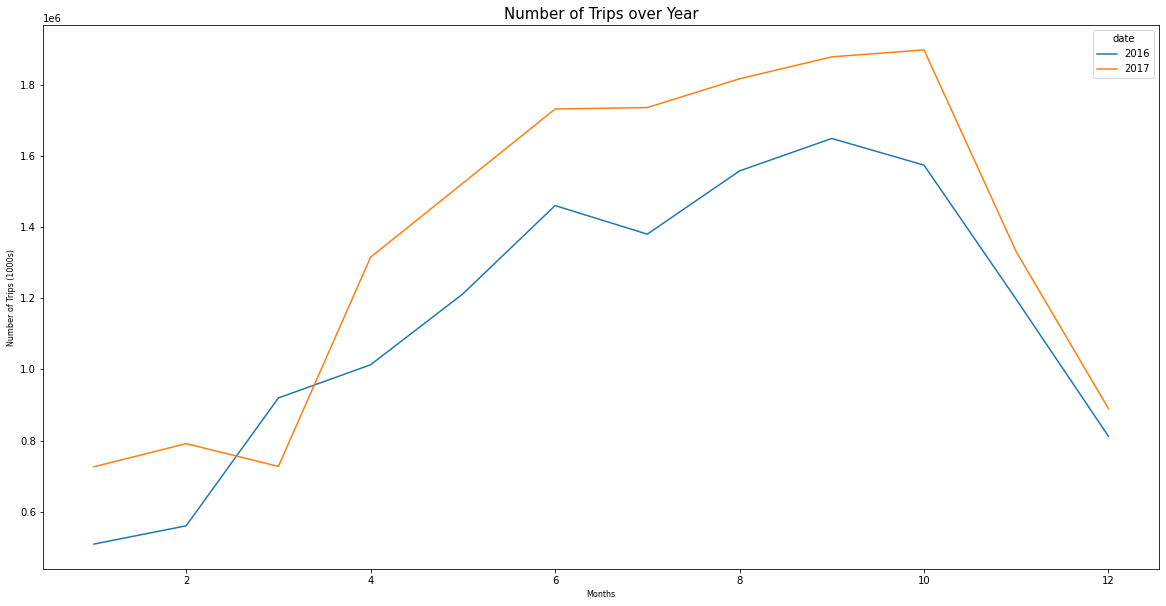

<Figure size 1440x720 with 0 Axes>

In [237]:
#importing CSV
trips = pd.read_csv('Trips Per Month.csv')
trips.index = pd.to_datetime(trips['date'])
trips.groupby(by=[trips.index.month, trips.index.year])['num_trips'].sum()
trips = pd.pivot_table(trips, index=trips.index.month, columns=trips.index.year,
                    values='num_trips', aggfunc='sum')

#adjusting the plot features
trips.plot(figsize = (20,10))
plt.title("Number of Trips over Year", fontsize = 15)
plt.xlabel("Months", fontsize = 8)
plt.ylabel("Number of Trips (1000s)", fontsize = 8)
plt.figure(figsize = (20,10))

**Can we drill down this trend further to determine which gender rides trips more often over time?**

Each of are the queries used to filter for each specific gender (0 = unknown, 1 = male , 2 = female)


SELECT 
Date(starttime) as Date,
COUNT(*) AS num_trips
from bike
WHERE extract(year from starttime) = 2016 or extract(year from starttime) = 2017
and gender = 0 
group by Date(starttime)

SELECT 
Date(starttime) as Date,
COUNT(*) AS num_trips
from bike
WHERE gender = 1
and ( extract(year from starttime) = 2016 or extract(year from starttime) = 2017 )
group by Date(starttime)

SELECT 
Date(starttime) as Date,
COUNT(*) AS num_trips
from bike
WHERE gender = 2
and ( extract(year from starttime) = 2016 or extract(year from starttime) = 2017 )
group by Date(starttime)

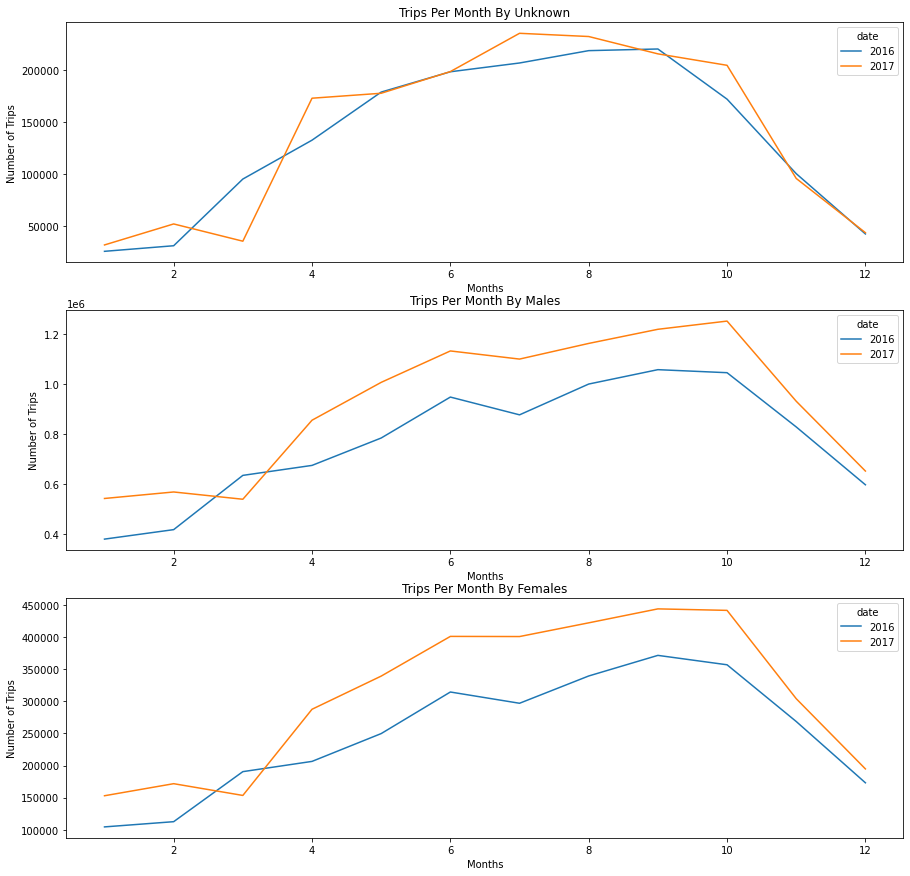

In [188]:
#Calling each of the files and pivoting them into pivot tables for graphing purposes
tripsunknown = pd.read_csv('Trips Per Month - Unknown.csv')
tripsunknown.index = pd.to_datetime(tripsunknown['date'])
tripsunknown.groupby(by=[tripsunknown.index.month, tripsunknown.index.year])['num_trips'].sum()
tripsunknown = pd.pivot_table(tripsunknown, index=tripsunknown.index.month, columns=tripsunknown.index.year,
                    values='num_trips', aggfunc='sum')

tripsgirl = pd.read_csv('Trips Per Month - Female.csv')
tripsgirl.index = pd.to_datetime(tripsgirl['date'])
tripsgirl.groupby(by=[tripsgirl.index.month, tripsgirl.index.year])['num_trips'].sum()
tripsgirl = pd.pivot_table(tripsgirl, index=tripsgirl.index.month, columns=tripsgirl.index.year,
                    values='num_trips', aggfunc='sum')

tripsboy = pd.read_csv('Trips Per Month - Male.csv')
tripsboy.index = pd.to_datetime(tripsboy['date'])
tripsboy.groupby(by=[tripsboy.index.month, tripsboy.index.year])['num_trips'].sum()
tripsboy = pd.pivot_table(tripsboy, index=tripsboy.index.month, columns=tripsboy.index.year,
                    values='num_trips', aggfunc='sum')

#Setting up each subplot in order for easy comparsion
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

tripsunknown.plot(ax=axes[0])
tripsboy.plot(ax=axes[1])
tripsgirl.plot(ax=axes[2])

axes[0].set_title('Trips Per Month By Unknown')
axes[1].set_title('Trips Per Month By Males')
axes[2].set_title('Trips Per Month By Females')

for axes in axes.flat:
    axes.set(xlabel='Months', ylabel='Number of Trips')


### Number of Trips on given hour

The number of trips can also be broken down into what hour of the day is most popular. 

SELECT 
extract(hour from starttime) as Hours,
count(*) as TripCounts,
ROUND(avg(cast(tripduration as int) / 60),2) as duration
FROM bike where
(extract(year from starttime) = 2016 or extract(year from starttime) = 2017)
group by extract(hour from starttime)


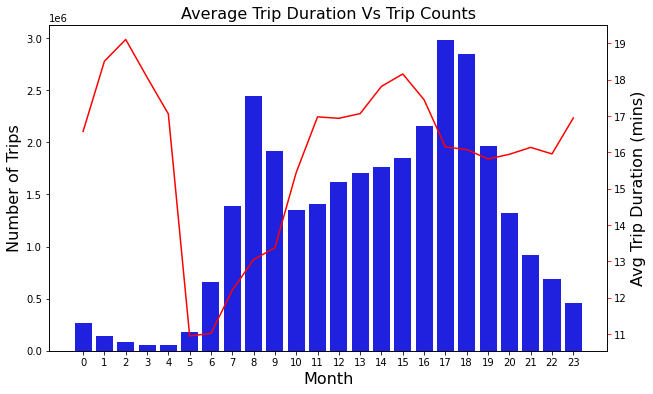

In [324]:
hour = pd.read_csv('PeakHourTrips.csv')

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = sns.barplot(x='hours', y='tripcounts', data= hour, color = "blue")
ax1.set_title('Average Trip Duration Vs Trip Counts', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Number of Trips', fontsize=16, color= 'Black')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Avg Trip Duration (mins)', fontsize=16, color= 'Black')
ax2 = sns.lineplot(x ='hours' , y = 'duration', data = hour, color = 'red')
ax2.tick_params(axis='y', color= 'red')
plt.show()

## Rider’s Ages

New York City is one of the largest metropolitan within America, which means they have millions of different aged people. One of the columns provided was the "birth year". It can be used to determine which age group we can target to improve the amount of subscription



**Which age group of the population uses the Citi Bike system and how many of them are actually subscribers?**

*Query Used*

SELECT 
extract(year from now()) - birth_year as Age,
usertype, 
count(*) as tripcount
FROM bike
WHERE  (extract(year from now()) - birth_year) < 90
and (extract(year from starttime) = 2016 or extract(year from starttime) = 2017)
group by usertype , ( extract(year from now()) - birth_year)

SELECT 
extract(year from now()) - birth_year as Age,
gender, 
count(*) as tripcount
FROM bike
WHERE  (extract(year from now()) - birth_year) < 90
and (extract(year from starttime) = 2016 or extract(year from starttime) = 2017)
group by usertype , ( extract(year from now()) - birth_year)


<Figure size 1440x720 with 0 Axes>

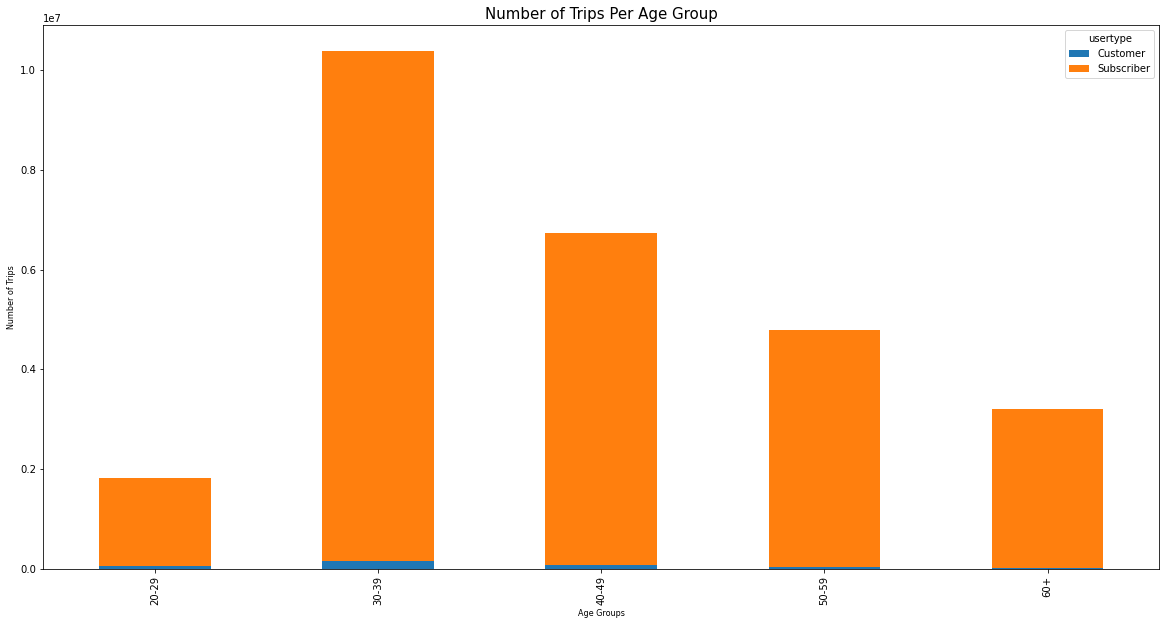

<Figure size 1440x720 with 0 Axes>

In [261]:
age = pd.read_csv('Age-UserType-TripCount.csv')
bins= [20,30,40,50,60,90]
labels = ['20-29','30-39','40-49','50-59','60+']
age['AgeGroup'] = pd.cut(age['age'], bins=bins, labels=labels, right=False)


age_grouped = age.groupby(by= [age.AgeGroup, age.usertype])['tripcount'].sum().unstack().plot(kind = 'bar', stacked = 'True', figsize = (20,10))
plt.title("Number of Trips Per Age Group", fontsize = 15)
plt.xlabel("Age Groups", fontsize = 8)
plt.ylabel("Number of Trips", fontsize = 8)
plt.figure(figsize = (20,10))

<Figure size 1440x720 with 0 Axes>

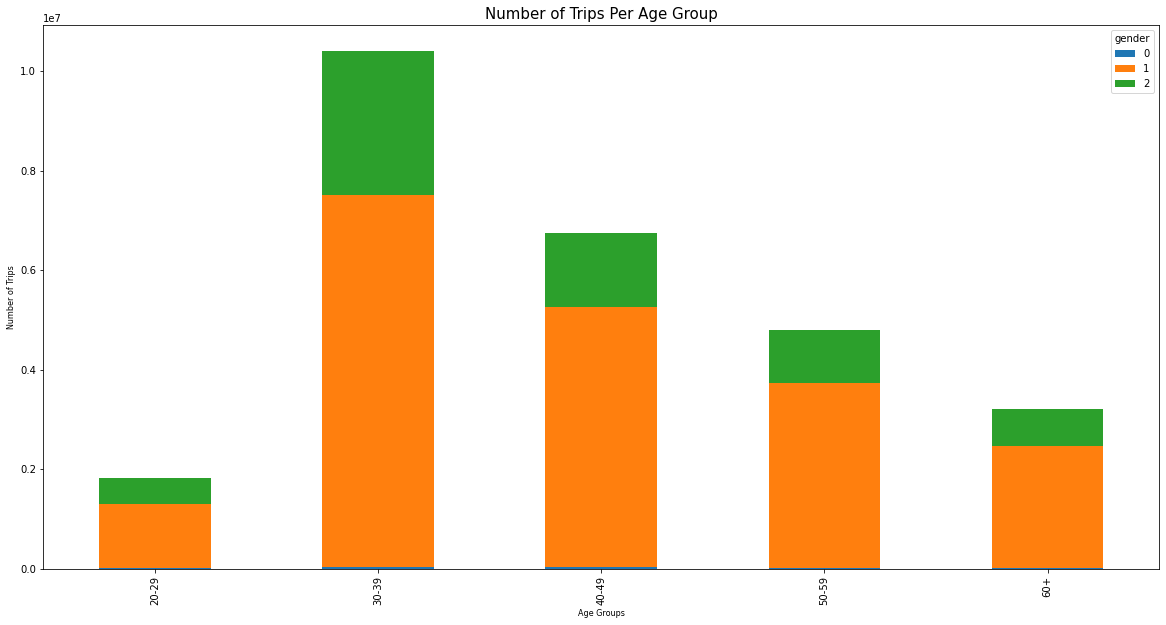

<Figure size 1440x720 with 0 Axes>

In [263]:
age = pd.read_csv('Age-Gender-TripCount.csv')
bins= [20,30,40,50,60,90]
labels = ['20-29','30-39','40-49','50-59','60+']
age['AgeGroup'] = pd.cut(age['age'], bins=bins, labels=labels, right=False)


age_grouped = age.groupby(by= [age.AgeGroup, age.gender])['tripcount'].sum().unstack().plot(kind = 'bar', stacked = 'True', figsize = (20,10))
plt.title("Number of Trips Per Age Group", fontsize = 15)
plt.xlabel("Age Groups", fontsize = 8)
plt.ylabel("Number of Trips", fontsize = 8)
plt.figure(figsize = (20,10))

### Which are the most and least popular stations?

Determining which stations has the most/least users taking bikes can determine which bikes users should have more bikes 


SELECT
  start_station_name,
  COUNT(*) AS TripCount
FROM bike
GROUP BY
start_station_name
ORDER BY
COUNT(*) desc
limit 10


SELECT
  start_station_name,
  COUNT(*) AS TripCount
FROM bike
GROUP BY
start_station_name
ORDER BY
COUNT(*)
limit 10


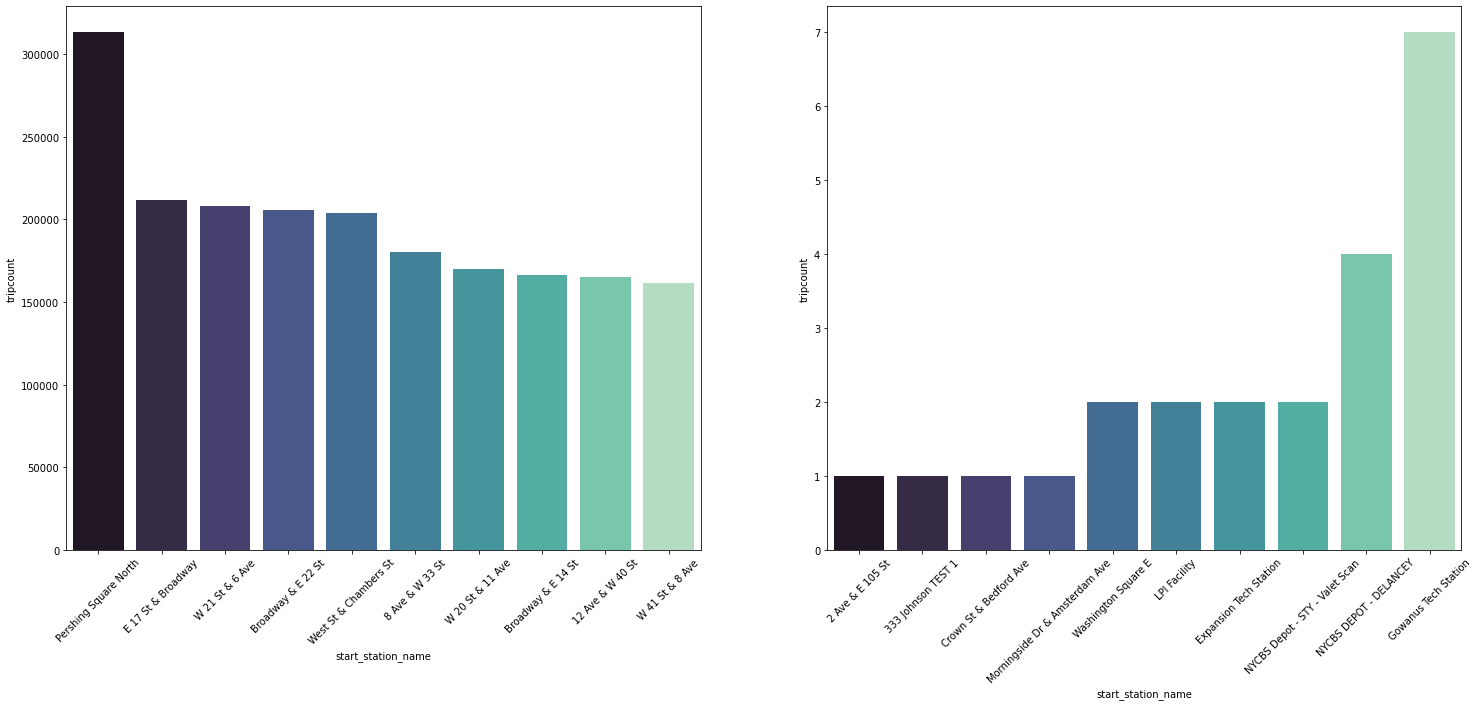

In [369]:
moststation = pd.read_csv('Most Popular Stations.csv')
leaststation = pd.read_csv('Least Popular Stations.csv')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
sns.barplot(ax =ax[0], x='start_station_name', y='tripcount', data= moststation, palette = "mako")
ax[0].tick_params(axis='x', rotation=45)
sns.barplot(ax = ax[1], x='start_station_name', y='tripcount', data= leaststation, palette = "mako")
ax[1].tick_params(axis='x', rotation=45)